In [1]:
import LibV1
from datetime import date
import datetime
import pandas as pd
import matplotlib
import numpy as np

In [2]:
frame = LibV1.loadTrades("PEPEUSDT", date(2023, 11, 1), date(2024, 2, 1), LibV1.Interval.monthly)
frame

Loaded 4882951 trades


,id,price,qty,is_buyer_maker,is_best_match
time,,,,,
2023-11-01 00:00:05.646,11795811,1.150000e-06,13043478.0,False,True
2023-11-01 00:00:42.699,11795812,1.140000e-06,21630722.0,True,True
2023-11-01 00:00:55.546,11795813,1.140000e-06,562639210.0,True,True
2023-11-01 00:00:56.015,11795814,1.150000e-06,23820769.0,False,True
2023-11-01 00:01:16.521,11795815,1.140000e-06,108155624.0,True,True
...,...,...,...,...,...
2024-01-31 23:58:38.692,16678757,9.200000e-07,108695652.0,False,True
2024-01-31 23:59:01.029,16678758,9.200000e-07,21739130.0,False,True
2024-01-31 23:59:09.402,16678759,9.100000e-07,21739130.0,True,True


<Axes: xlabel='time'>

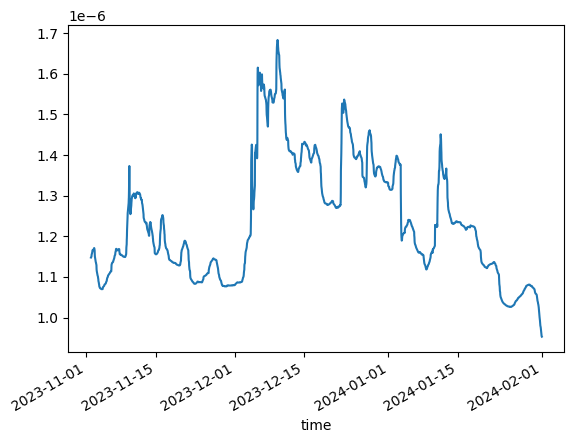

In [3]:
frame['price'].rolling(50000).mean().plot()

<Axes: >

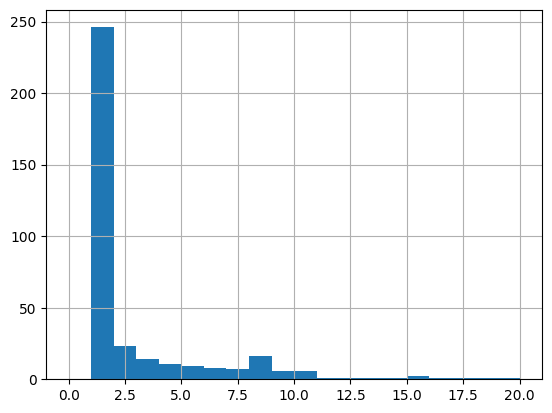

In [4]:
frame['qty'].hist(bins=20,range=[0, 20])

In [5]:
LibV1.getSymbols(lambda sym: sym.endswith("USDT"))

['1000SATSUSDT',
 '1INCHDOWNUSDT',
 '1INCHUPUSDT',
 '1INCHUSDT',
 'AAVEDOWNUSDT',
 'AAVEUPUSDT',
 'AAVEUSDT',
 'ACAUSDT',
 'ACEUSDT',
 'ACHUSDT',
 'ACMUSDT',
 'ADADOWNUSDT',
 'ADAUPUSDT',
 'ADAUSDT',
 'ADXUSDT',
 'AERGOUSDT',
 'AEURUSDT',
 'AEVOUSDT',
 'AGIXUSDT',
 'AGLDUSDT',
 'AIONUSDT',
 'AIUSDT',
 'AKROUSDT',
 'ALCXUSDT',
 'ALGOUSDT',
 'ALICEUSDT',
 'ALPACAUSDT',
 'ALPHAUSDT',
 'ALPINEUSDT',
 'ALTUSDT',
 'AMBUSDT',
 'AMPUSDT',
 'ANCUSDT',
 'ANKRUSDT',
 'ANTUSDT',
 'ANYUSDT',
 'APEUSDT',
 'API3USDT',
 'APTUSDT',
 'ARBUSDT',
 'ARDRUSDT',
 'ARKMUSDT',
 'ARKUSDT',
 'ARPAUSDT',
 'ARUSDT',
 'ASRUSDT',
 'ASTRUSDT',
 'ASTUSDT',
 'ATAUSDT',
 'ATMUSDT',
 'ATOMUSDT',
 'AUCTIONUSDT',
 'AUDIOUSDT',
 'AUDUSDT',
 'AUTOUSDT',
 'AVAUSDT',
 'AVAXUSDT',
 'AXLUSDT',
 'AXSUSDT',
 'BADGERUSDT',
 'BAKEUSDT',
 'BALUSDT',
 'BANANAUSDT',
 'BANDUSDT',
 'BARUSDT',
 'BATUSDT',
 'BBUSDT',
 'BCCUSDT',
 'BCHABCUSDT',
 'BCHDOWNUSDT',
 'BCHSVUSDT',
 'BCHUPUSDT',
 'BCHUSDT',
 'BEAMUSDT',
 'BEAMXUSDT',
 'BEARUSDT',
 

In [6]:
simplified = LibV1.reSampleTrades(frame, datetime.timedelta(seconds=10))

In [7]:
simplified['avg_vol_slow'] = simplified['qty'].rolling(6 * 60 * 12).mean()
simplified['avg_vol_fast'] = simplified['qty'].rolling(6 * 5).mean()
simplified['exc'] = np.where(simplified['avg_vol_fast'] > simplified['avg_vol_slow'] * 40, 1, 0)
len(simplified[simplified['exc'] == 1])

37

In [10]:
ids = simplified.index[simplified['exc'] == 1].tolist()
event = ids[0]
filtered_df = simplified.loc[(simplified.index >= event - pd.Timedelta(minutes=30))
                     & (simplified.index < event + pd.Timedelta(minutes=30))]

<Axes: >

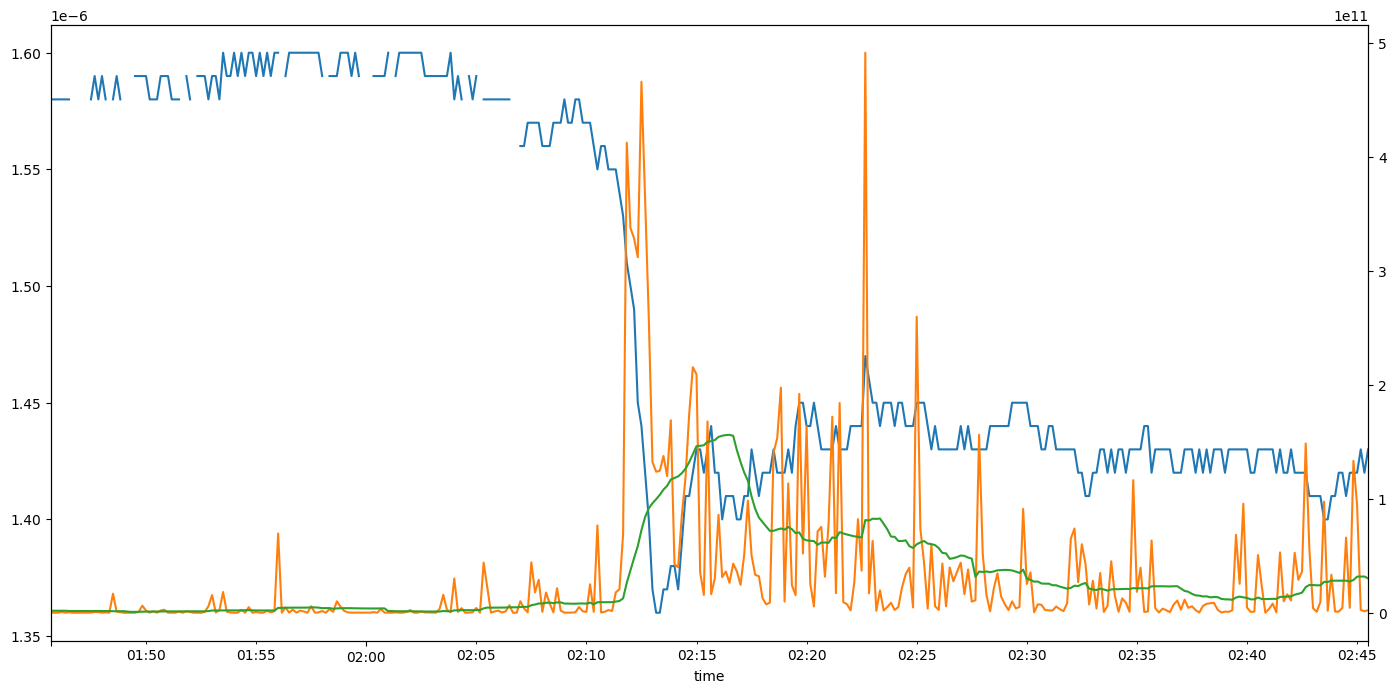

In [11]:
filtered_df['price'].plot(figsize=(17, 8))
filtered_df['qty'].plot(figsize=(17, 8), secondary_y=True)
filtered_df['avg_vol_fast'].plot(figsize=(17, 8), secondary_y=True)

In [ ]:
filtered_df.plot(figsize=(17, 8), subplots=True)